# Model performance and accuracy

1 feature selection

      correlation
      box plot
      p values (OLS)

2 cross validation (common)

3 grid search (common)

In [1]:
# common 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# ml preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# algo
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('../datasets/diamond_pricing.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paleonium  1000 non-null   int64  
 1   Pressure   1000 non-null   int64  
 2   Price      1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339


In [3]:
x=df[['Paleonium','Pressure']]
y=df['Price']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0)

In [4]:
m0=LinearRegression()
m0.fit(xtrain,ytrain)
m0.score(xtest,ytest)*100

9.519827070002417

In [6]:
m1=DecisionTreeRegressor()
m1.fit(xtrain,ytrain)
m1.score(xtest,ytest)*100

96.06810143230412

In [7]:
m2=RandomForestRegressor()
m2.fit(xtrain,ytrain)
m2.score(xtest,ytest)*100

97.72601026880847

In [8]:
m3=KNeighborsRegressor()
m3.fit(xtrain,ytrain)
m3.score(xtest,ytest)*100

56.32691844914095

# Cross Validation
from sklearn.model_selection import cross_val_score we use this to check if the model created from algo work well with data or not

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
data=[]

In [13]:
# linear reg
scores = cross_val_score(m0,x,y,cv=4)
print(f'mean score => {scores.mean() *100:.2f}, cross val => {scores * 100}')
scores = scores * 100
data.append({
    'algo':'linear reg.',
    'cv0': scores[0],
    'cv1': scores[1],
    'cv2': scores[2],
    'cv3': scores[3],
})
data

mean score => 7.42, cross val => [9.36937106 3.47592133 8.16364376 8.66355679]


[{'algo': 'linear reg.',
  'cv0': 9.369371059886955,
  'cv1': 3.475921331374232,
  'cv2': 8.163643756147131,
  'cv3': 8.663556790007465}]

In [14]:
scores = cross_val_score(m1,x,y,cv=4)
print(f'mean score => {scores.mean() *100:.2f}, cross val => {scores * 100}')
scores = scores * 100
data.append({
    'algo':'decision tree',
    'cv0': scores[0],
    'cv1': scores[1],
    'cv2': scores[2],
    'cv3': scores[3],
})
data

mean score => 95.57, cross val => [95.27019283 96.61137721 95.69640874 94.70705545]


[{'algo': 'linear reg.',
  'cv0': 9.369371059886955,
  'cv1': 3.475921331374232,
  'cv2': 8.163643756147131,
  'cv3': 8.663556790007465},
 {'algo': 'decision tree',
  'cv0': 95.27019283276104,
  'cv1': 96.61137720938426,
  'cv2': 95.6964087408041,
  'cv3': 94.70705544807993}]

In [15]:
# random forest
scores = cross_val_score(m2,x,y,cv=4)
print(f'mean score => {scores.mean() *100:.2f}, cross val => {scores * 100}')
scores = scores * 100
data.append({
    'algo':'random forest',
    'cv0': scores[0],
    'cv1': scores[1],
    'cv2': scores[2],
    'cv3': scores[3],
})
data

mean score => 97.74, cross val => [97.55714435 97.49662583 98.03433971 97.85308475]


[{'algo': 'linear reg.',
  'cv0': 9.369371059886955,
  'cv1': 3.475921331374232,
  'cv2': 8.163643756147131,
  'cv3': 8.663556790007465},
 {'algo': 'decision tree',
  'cv0': 95.27019283276104,
  'cv1': 96.61137720938426,
  'cv2': 95.6964087408041,
  'cv3': 94.70705544807993},
 {'algo': 'random forest',
  'cv0': 97.5571443479455,
  'cv1': 97.49662583040055,
  'cv2': 98.03433971066342,
  'cv3': 97.85308474779909}]

In [16]:
# nearest neighbor
scores = cross_val_score(m3,x,y,cv=4)
print(f'mean score => {scores.mean() *100:.2f}, cross val => {scores * 100}')
scores = scores * 100
data.append({
    'algo':'knn',
    'cv0': scores[0],
    'cv1': scores[1],
    'cv2': scores[2],
    'cv3': scores[3],
})
data

mean score => 55.59, cross val => [65.55938886 49.98008102 50.75358555 56.0756552 ]


[{'algo': 'linear reg.',
  'cv0': 9.369371059886955,
  'cv1': 3.475921331374232,
  'cv2': 8.163643756147131,
  'cv3': 8.663556790007465},
 {'algo': 'decision tree',
  'cv0': 95.27019283276104,
  'cv1': 96.61137720938426,
  'cv2': 95.6964087408041,
  'cv3': 94.70705544807993},
 {'algo': 'random forest',
  'cv0': 97.5571443479455,
  'cv1': 97.49662583040055,
  'cv2': 98.03433971066342,
  'cv3': 97.85308474779909},
 {'algo': 'knn',
  'cv0': 65.55938885969191,
  'cv1': 49.98008102062565,
  'cv2': 50.75358554780218,
  'cv3': 56.075655198812434}]

In [18]:
# convert to data frame
cross_val_df = pd.DataFrame(data)
cross_val_df = cross_val_df.set_index('algo')
cross_val_df

,cv0,cv1,cv2,cv3
algo,,,,
linear reg.,9.369371,3.475921,8.163644,8.663557
decision tree,95.270193,96.611377,95.696409,94.707055
random forest,97.557144,97.496626,98.034340,97.853085
knn,65.559389,49.980081,50.753586,56.075655


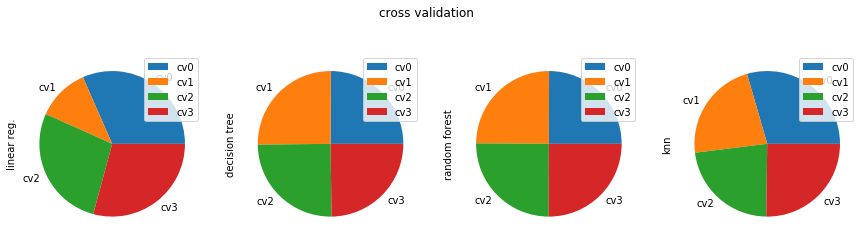

In [19]:
cross_val_df.T.plot(kind='pie',subplots=True,figsize=(15,4),title='cross validation')
plt.show()

# Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV

In [22]:
# random forest
scores = cross_val_score(m2,x,y,cv=4)
print(f'mean score => {scores.mean() *100:.2f}, cross val => {scores * 100}')

mean score => 97.88, cross val => [98.08142915 97.60598161 97.84631408 97.96832967]


In [23]:
params = {
    'n_estimators':[10,50,100,150,300,500],
    'criterion':['mse','mae'],
    'max_features':['auto','sqrt','log2']
}
model = RandomForestRegressor()
grid = GridSearchCV(model, param_grid=params, cv=3, n_jobs=-1,verbose=True)

In [24]:
grid

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
    

# this is wat the grid object does
    - RandomForestRegressor(n_estimators=10,criterion='mse',max_features='auto')
    - RandomForestRegressor(n_estimators=50,criterion='mse',max_features='auto')
    - RandomForestRegressor(n_estimators=100,criterion='mse',max_features='auto')
    - RandomForestRegressor(n_estimators=150,criterion='mse',max_features='auto')
    - RandomForestRegressor(n_estimators=300,criterion='mse',max_features='auto')
    - RandomForestRegressor(n_estimators=500,criterion='mse',max_features='auto')
    - RandomForestRegressor(n_estimators=10,criterion='mae',max_features='auto')
    - RandomForestRegressor(n_estimators=10,criterion='mae',max_features='sqrt')
    - RandomForestRegressor(n_estimators=10,criterion='mae',max_features='log2')
    - ...
and so on

In [25]:
grid.fit(x,y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
    

In [26]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [27]:
grid.cv_results_.get('rank_test_score')

array([30, 27, 20, 17,  6, 10, 35, 31, 25, 24, 16, 23, 36, 32, 19, 15, 21,
       22, 29, 18,  3,  4,  1,  2, 33, 26, 13, 12,  8,  5, 34, 28, 11, 14,
        9,  7])

In [28]:
grid_scores_df = pd.DataFrame(grid.cv_results_)
grid_scores_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.053522,0.010183,0.007314,0.002618,mse,auto,10,"{'criterion': 'mse', 'max_features': 'auto', '...",0.975384,0.978384,0.976569,0.976777,0.001234,30
1,0.272604,0.049281,0.013629,0.003083,mse,auto,50,"{'criterion': 'mse', 'max_features': 'auto', '...",0.976546,0.977475,0.981236,0.978417,0.002028,27
2,0.485693,0.060659,0.020944,0.004955,mse,auto,100,"{'criterion': 'mse', 'max_features': 'auto', '...",0.977264,0.978359,0.981424,0.979014,0.001761,20
3,0.817143,0.139172,0.028258,0.003290,mse,auto,150,"{'criterion': 'mse', 'max_features': 'auto', '...",0.978408,0.979018,0.981180,0.979534,0.001189,17
4,1.633961,0.222130,0.072473,0.018216,mse,auto,300,"{'criterion': 'mse', 'max_features': 'auto', '...",0.980442,0.979340,0.982076,0.980619,0.001124,6
5,2.620988,0.360734,0.109707,0.021297,mse,auto,500,"{'criterion': 'mse', 'max_features': 'auto', '...",0.979084,0.979050,0.981622,0.979917,0.001204,10
6,0.038563,0.000471,0.004986,0.000815,mse,sqrt,10,"{'criterion': 'mse', 'max_features': 'sqrt', '...",0.968711,0.966619,0.972701,0.969343,0.002522,35
7,0.221074,0.042207,0.014959,0.007768,mse,sqrt,50,"{'criterion': 'mse', 'max_features': 'sqrt', '...",0.975110,0.976302,0.978202,0.976536,0.001273,31
8,0.457108,0.073849,0.022940,0.005701,mse,sqrt,100,"{'criterion': 'mse', 'max_features': 'sqrt', '...",0.979428,0.976317,0.980743,0.978830,0.001855,25
9,0.626324,0.106096,0.031915,0.006465,mse,sqrt,150,"{'criterion': 'mse', 'max_features': 'sqrt', '...",0.980526,0.975847,0.980276,0.978885,0.002149,24
